In [1]:
import sys
sys.path.append('..')
from viz.shot_xg import plot_shot_xg
import pandas as pd

NameError: name 'ç' is not defined

In [ ]:
EVENTS_CSV = '../data/match_events.csv'
HOME_LOGO = '../../blog/logos/LaLiga/Athletic Bilbao.png'  
AWAY_LOGO = '../../blog/logos/LaLiga/FC Barcelona.png'

In [ ]:
events = pd.read_csv(EVENTS_CSV)

# Filtrar solo disparos/goles
shots = events[events['event_type'].str.contains('Shot|Goal', na=False)].copy()

# shot_xg espera estas columnas
shots['is_goal'] = shots['is_goal'] == 'True'
shots['body_part'] = shots['qualifiers'].str.contains('Head', na=False).map({True: 'Head', False: 'Foot'})

# Guardar formato esperado
shots.to_csv('shots_temp.csv', index=False)
print(f"Disparos: {len(shots)}")

Disparos: 22


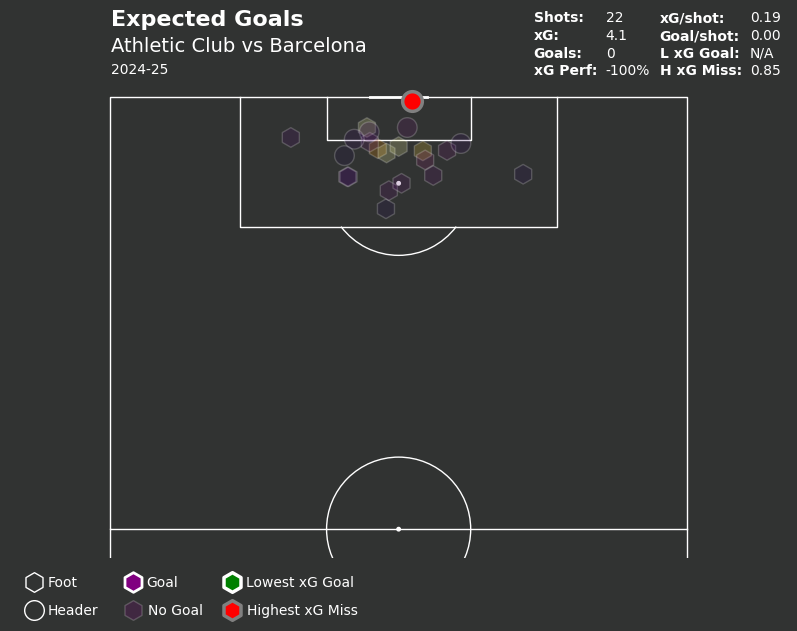

In [ ]:
# %% Visualizar
fig = plot_shot_xg(
    csv_path='shots_temp.csv',
    filter_by='all',
    season='2024-25',
    home_logo_path=HOME_LOGO,
    away_logo_path=AWAY_LOGO
)